In [4]:
import build.pybhjet as pybhjet
import numpy as np
import math
import matplotlib.pyplot as plt
from bhjet_plotting import *

bhjet = pybhjet.PyBHJet()

In [6]:
bhjet.load_params("ip.dat")
bhjet.set_parameter("infosw", 2)

In [7]:
bhjet.run()

#need to call for the output to be accessible 
output = bhjet.get_output()

#get the emission components into dictionaries to plot easier 
components = preprocess_component_output(output)


run() execution time: 0.332261 seconds


In [7]:
bhjet.print_parameters()

BHJet Parameters:
-----------------
Mbh      : 6.6e+08     M_sun
theta    : 66          degrees
dist     : 9080        kpc
redsh    : 0.003633    
jetrat   : 0.00064     Eddington ratio
r_0      : 7.72058     Jet base radius, R_g
z_diss   : 24.971      nT particle injection region, R_g
z_acc    : 24.971      Jet acceleration region, R_g
z_max    : 100000      Maximum Jet Distance, R_g
t_e      : 655.986     Temperature of rel. electrons in nozzle, keV
f_nth    : 0.1         Percentage of particles acc. into nT tail 
f_pl     : 4.67634     Dissipation Parameter
pspec    : 1.5         Slope of nT lepton distribution
f_heat   : 16.247      Shock Heating
f_beta   : 0.1         Adiabatic Cooling Timescale
f_sc     : 7.98968e-09  < 0.1, Max. E of nT particles
p_beta   : 0.02        Plasma Beta [Regulates Pair Content in BHJet for velsw > 1] 
sig_acc  : 0.01        Magnetization at acceleration region
l_disk   : 2.3e-06     Disk Luminosity, L_edd
r_in     : 20          Inner Disk Radius, R_g


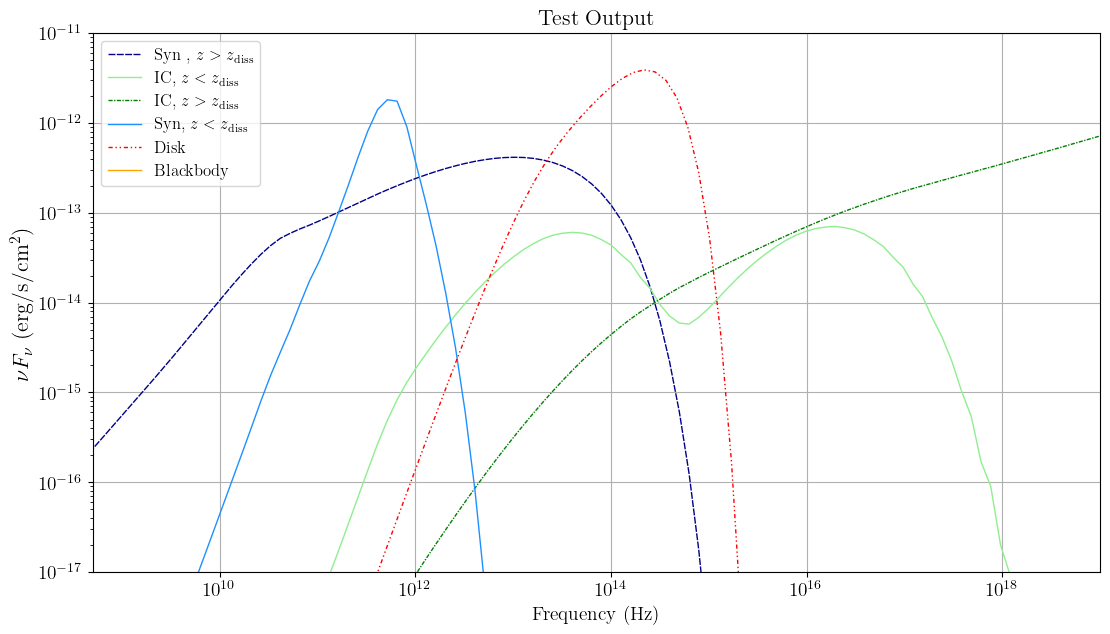

In [8]:
plot_nufnu_ergshz(components, title = 'Test Output')
plt.ylim(1e-17, 1e-11)
plt.xlim(5e8, 1e19)
plt.show()

### Multi Zone Output Comparison - Original BHJet Example

In [9]:
#for testing:
path_to_bhjet_output = "/Users/ruby/Models/BHJet/BHJet/"
bhjet.load_params(path_to_bhjet_output+"/Input/ip.dat")
bhjet.run()
output = bhjet.get_output()

mjy = 1.e26
kevconv = 1
dist = bhjet.get_parameter("dist")
fluxconv = 4.*math.pi*(dist*3.*10**21)**2

Unphysical pair content: -88.1873 pairs per proton. Check the value of plasma beta!
Temperature too high, assuming it's 2500 kev for IC calculation!
Don't trust the output spectrum slope and change parameters!
Temperature too high, assuming it's 2500 kev for IC calculation!
Don't trust the output spectrum slope and change parameters!
run() execution time: 2.39021 seconds


In [10]:
disk_e = np.array([point.energy for point in output.disk])
disk_f = np.array([point.flux for point in output.disk])
Disk = np.genfromtxt(path_to_bhjet_output+"Output/Disk.dat")

presyn_e = np.array([point.energy for point in output.presyn])
presyn_f = np.array([point.flux for point in output.presyn])

postsyn_e = np.array([point.energy for point in output.postsyn])
postsyn_f = np.array([point.flux for point in output.postsyn])

Presyn = np.genfromtxt(path_to_bhjet_output+"Output/Presyn.dat")
Postsyn = np.genfromtxt(path_to_bhjet_output+"Output/Postsyn.dat")

In [11]:
print("My Code: Presyn Data:", presyn_e[:1], presyn_f[:1])
print("Original Code: Presyn Data:", Presyn[:1])

My Code: Presyn Data: [27292905.4024245] [4.98976454e-07]
Original Code: Presyn Data: [[2.72929e+07 4.98976e-07]]


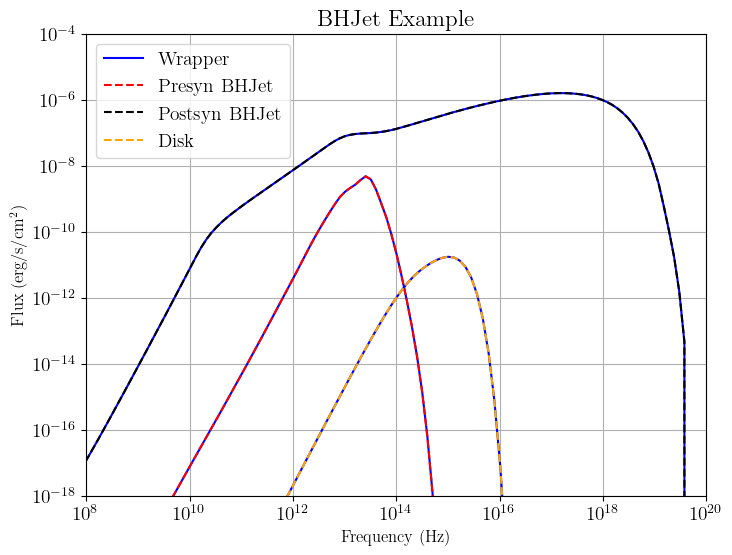

In [12]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(presyn_e, presyn_e*presyn_f/mjy_conv, linewidth=1.5, color="blue", label="Wrapper")
ax.plot(postsyn_e, postsyn_e*postsyn_f/mjy_conv, linewidth=1.5, color="blue", linestyle='-')

ax.plot(Presyn.T[0],Presyn.T[1]*Presyn.T[0]/mjy_conv,linewidth=1.5, label = "Presyn BHJet", color = 'red', linestyle = '--')
ax.plot(Postsyn.T[0],Postsyn.T[1]*Postsyn.T[0]/mjy_conv,linewidth=1.5, linestyle='--', label = 'Postsyn BHJet', color = 'black')

ax.plot(disk_e, disk_e*disk_f/mjy_conv, linewidth=1.5, color="blue")
ax.plot(Disk.T[0],Disk.T[1]*Disk.T[0]/mjy_conv, color = 'orange', linestyle = '--', label='Disk' )

ax.set_xlim(1e8, 1e20)
ax.set_ylim(1e-18, 1e-4)
ax.legend()
ax.grid(True)

ax.set_xlabel(r"Frequency (Hz)",fontsize=12)
ax.set_title("BHJet Example")
ax.set_ylabel(r"Flux (erg/s/cm$^2$)",fontsize=12)
ax.set_xscale('log',base=10)
ax.set_yscale('log',base=10)

### Single Zone Example

In [24]:
bhjet.run_singlezone()

In [26]:
syn_ex = np.genfromtxt("/Users/ruby/Models/BHJet/Examples/Output/Singlezone_Syn.dat")
com_ex = np.genfromtxt("/Users/ruby/Models/BHJet/Examples/Output/Singlezone_SSC.dat")

energy = np.array([point.energy for point in output.cyclosyn_zones])
flux = np.array([point.flux for point in output.cyclosyn_zones])

e_compton = np.array([point.energy for point in output.compton_zones])
f_compton = np.array([point.flux for point in output.compton_zones])

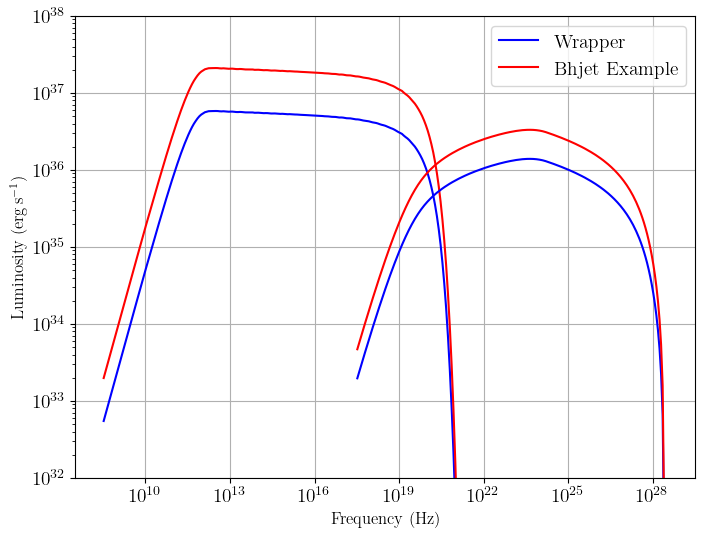

In [27]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(energy, energy*flux/mjy ,linewidth=1.5, color="blue", label="Wrapper")
ax.plot(syn_ex.T[0],syn_ex.T[0]*syn_ex.T[1],linewidth=1.5, label = "Bhjet Example", color = 'red')

ax.plot(e_compton, e_compton*f_compton/mjy, linewidth=1.5, color="blue")
ax.plot(com_ex.T[0],com_ex.T[0]*com_ex.T[1],linewidth=1.5, color = 'red')

ax.set_ylim(1e32, 1e38)
ax.legend()
ax.grid(True)

ax.set_xlabel("Frequency ($\\rm{Hz}$)",fontsize=12)
ax.set_ylabel("Luminosity ($\\rm{erg\,s^{-1}}$)",fontsize=12)
ax.set_xscale('log')
ax.set_yscale('log')
